In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import ipywidgets as widgets
from ipywidgets import interact,interact_manual,interactive,fixed

In [2]:
def scroll(df,nr=7,nc=8):
    def peek(row=0,col=0):
        return df.iloc[row:row+nr,col:col+nc]
    if len(df.columns) <= nc:
        interact(peek,
                row=(0,len(df)-nr,nr),
                col=fixed(0))
    else :
        interact(peek,
                row=(0,len(df)-nr,nr),
                col=(0,len(df.columns),nr))
    print(f'rows:{df.shape[0]}\ncolumns:{df.shape[1]}')

In [3]:
jobData = pd.read_excel("jobSeeker.xlsx")
popData = pd.read_excel('marrige.xlsx')
jobData

,Permanent Location by Governorate,Gender,Age Group,Count
0,Muscat,Male,15 - 19,216
1,Muscat,Male,20 - 24,1652
2,Muscat,Male,25 - 29,896
3,Muscat,Male,30 - 34,230
4,Muscat,Male,35 - 39,106
...,...,...,...,...
205,Al Wusta,Female,40 - 44,2
206,Al Wusta,Female,50 - 54,1
207,Unknown,Male,15 - 19,2
208,Unknown,Male,20 - 24,2


In [4]:
jobData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Permanent Location by Governorate  210 non-null    object
 1   Gender                             210 non-null    object
 2   Age Group                          210 non-null    object
 3   Count                              210 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.7+ KB


In [5]:
popData

,Residential Status,Place of Birth by Governorate,Alive,Gender,Age Group,Count
0,Omani,Muscat,Yes,Male,00 - 04,72480
1,Omani,Muscat,Yes,Male,05 - 09,2319
2,Omani,Muscat,Yes,Male,10 - 14,9415
3,Omani,Muscat,Yes,Male,15 - 19,14978
4,Omani,Muscat,Yes,Male,20 - 24,31329
...,...,...,...,...,...,...
403,Omani,Unknown,Yes,Female,60 - 64,2952
404,Omani,Unknown,Yes,Female,65 - 69,2196
405,Omani,Unknown,Yes,Female,70 - 74,1239
406,Omani,Unknown,Yes,Female,75 - 79,589


In [6]:
jobData['Age Group'].unique()

array(['15 - 19', '20 - 24', '25 - 29', '30 - 34', '35 - 39', '40 - 44',
       '45 - 49', '50 - 54', '55 - 59', '60 - 64'], dtype=object)

In [7]:
popData = popData[(popData['Age Group'] >= '15 - 19') & (popData['Age Group'] <= '60 - 64')].reset_index(drop=True)
popData

,Residential Status,Place of Birth by Governorate,Alive,Gender,Age Group,Count
0,Omani,Muscat,Yes,Male,15 - 19,14978
1,Omani,Muscat,Yes,Male,20 - 24,31329
2,Omani,Muscat,Yes,Male,25 - 29,30863
3,Omani,Muscat,Yes,Male,30 - 34,29585
4,Omani,Muscat,Yes,Male,35 - 39,24652
...,...,...,...,...,...,...
235,Omani,Unknown,Yes,Female,40 - 44,6231
236,Omani,Unknown,Yes,Female,45 - 49,4849
237,Omani,Unknown,Yes,Female,50 - 54,3956
238,Omani,Unknown,Yes,Female,55 - 59,3445


In [8]:
jobData

,Permanent Location by Governorate,Gender,Age Group,Count
0,Muscat,Male,15 - 19,216
1,Muscat,Male,20 - 24,1652
2,Muscat,Male,25 - 29,896
3,Muscat,Male,30 - 34,230
4,Muscat,Male,35 - 39,106
...,...,...,...,...
205,Al Wusta,Female,40 - 44,2
206,Al Wusta,Female,50 - 54,1
207,Unknown,Male,15 - 19,2
208,Unknown,Male,20 - 24,2


In [9]:
jobData = jobData[jobData['Permanent Location by Governorate'] != 'Unknown']
jobData

,Permanent Location by Governorate,Gender,Age Group,Count
0,Muscat,Male,15 - 19,216
1,Muscat,Male,20 - 24,1652
2,Muscat,Male,25 - 29,896
3,Muscat,Male,30 - 34,230
4,Muscat,Male,35 - 39,106
...,...,...,...,...
202,Al Wusta,Female,25 - 29,84
203,Al Wusta,Female,30 - 34,41
204,Al Wusta,Female,35 - 39,20
205,Al Wusta,Female,40 - 44,2


In [10]:
popData = popData[popData['Place of Birth by Governorate'] != 'Unknown']
popData

,Residential Status,Place of Birth by Governorate,Alive,Gender,Age Group,Count
0,Omani,Muscat,Yes,Male,15 - 19,14978
1,Omani,Muscat,Yes,Male,20 - 24,31329
2,Omani,Muscat,Yes,Male,25 - 29,30863
3,Omani,Muscat,Yes,Male,30 - 34,29585
4,Omani,Muscat,Yes,Male,35 - 39,24652
...,...,...,...,...,...,...
215,Omani,Al Wusta,Yes,Female,40 - 44,408
216,Omani,Al Wusta,Yes,Female,45 - 49,280
217,Omani,Al Wusta,Yes,Female,50 - 54,255
218,Omani,Al Wusta,Yes,Female,55 - 59,198


In [11]:
def print_unique_values_include(df1, df2, include_columns):
    for df in [df1, df2]:
        for i in df.columns:
            if i in include_columns:
                print(f"Unique values in column '{i}' of DataFrame:\n{df[i].unique()}\n")


In [12]:
def print_unique_values_exclude(df1, df2, exclude_columns):
    for df in [df1, df2]:
        for i in df.columns:
            if i not in exclude_columns:
                print(f"Unique values in column '{i}' of DataFrame:\n{df[i].unique()}\n")


In [13]:
print_unique_values_exclude(popData,jobData,['Count'])

Unique values in column 'Residential Status' of DataFrame:
['Omani']

Unique values in column 'Place of Birth by Governorate' of DataFrame:
['Muscat' 'Dhofar' 'Musandam' 'Al Buraymi' 'Ad Dakhliyah'
 'Al Batinah North' 'Al Batinah South' 'Ash Sharqiyah South'
 'Ash Sharqiyah North' 'Adh Dhahirah' 'Al Wusta']

Unique values in column 'Alive' of DataFrame:
['Yes']

Unique values in column 'Gender' of DataFrame:
['Male' 'Female']

Unique values in column 'Age Group' of DataFrame:
['15 - 19' '20 - 24' '25 - 29' '30 - 34' '35 - 39' '40 - 44' '45 - 49'
 '50 - 54' '55 - 59' '60 - 64']

Unique values in column 'Permanent Location by Governorate' of DataFrame:
['Muscat' 'Dhofar' 'Musandam' 'Al Buraymi' 'Ad Dakhliyah'
 'Al Batinah North' 'Al Batinah South' 'Ash Sharqiyah South'
 'Ash Sharqiyah North' 'Adh Dhahirah' 'Al Wusta']

Unique values in column 'Gender' of DataFrame:
['Male' 'Female']

Unique values in column 'Age Group' of DataFrame:
['15 - 19' '20 - 24' '25 - 29' '30 - 34' '35 - 39' '40 

In [14]:
def add_uniq(df1,df2,columns_want):
    for df in [df1,df2]:
        for i in df.columns:
            if i not in columns_want:
                print(f'Uniq of {i} : \n{df[i].unique()}\n')

In [15]:
add_uniq(popData,jobData,['Count'])

Uniq of Residential Status : 
['Omani']

Uniq of Place of Birth by Governorate : 
['Muscat' 'Dhofar' 'Musandam' 'Al Buraymi' 'Ad Dakhliyah'
 'Al Batinah North' 'Al Batinah South' 'Ash Sharqiyah South'
 'Ash Sharqiyah North' 'Adh Dhahirah' 'Al Wusta']

Uniq of Alive : 
['Yes']

Uniq of Gender : 
['Male' 'Female']

Uniq of Age Group : 
['15 - 19' '20 - 24' '25 - 29' '30 - 34' '35 - 39' '40 - 44' '45 - 49'
 '50 - 54' '55 - 59' '60 - 64']

Uniq of Permanent Location by Governorate : 
['Muscat' 'Dhofar' 'Musandam' 'Al Buraymi' 'Ad Dakhliyah'
 'Al Batinah North' 'Al Batinah South' 'Ash Sharqiyah South'
 'Ash Sharqiyah North' 'Adh Dhahirah' 'Al Wusta']

Uniq of Gender : 
['Male' 'Female']

Uniq of Age Group : 
['15 - 19' '20 - 24' '25 - 29' '30 - 34' '35 - 39' '40 - 44' '45 - 49'
 '50 - 54' '55 - 59' '60 - 64']



In [16]:
def reject_uniq(df1,df2,reject_col):
    for df in [df1,df2]:
        for i in df.columns:
            if i not in reject_col:
                print(f'Uniq of {i} is:\n{df[i].unique()}\n')

In [17]:
reject_uniq(popData,jobData,['Count'])

Uniq of Residential Status is:
['Omani']

Uniq of Place of Birth by Governorate is:
['Muscat' 'Dhofar' 'Musandam' 'Al Buraymi' 'Ad Dakhliyah'
 'Al Batinah North' 'Al Batinah South' 'Ash Sharqiyah South'
 'Ash Sharqiyah North' 'Adh Dhahirah' 'Al Wusta']

Uniq of Alive is:
['Yes']

Uniq of Gender is:
['Male' 'Female']

Uniq of Age Group is:
['15 - 19' '20 - 24' '25 - 29' '30 - 34' '35 - 39' '40 - 44' '45 - 49'
 '50 - 54' '55 - 59' '60 - 64']

Uniq of Permanent Location by Governorate is:
['Muscat' 'Dhofar' 'Musandam' 'Al Buraymi' 'Ad Dakhliyah'
 'Al Batinah North' 'Al Batinah South' 'Ash Sharqiyah South'
 'Ash Sharqiyah North' 'Adh Dhahirah' 'Al Wusta']

Uniq of Gender is:
['Male' 'Female']

Uniq of Age Group is:
['15 - 19' '20 - 24' '25 - 29' '30 - 34' '35 - 39' '40 - 44' '45 - 49'
 '50 - 54' '55 - 59' '60 - 64']



In [18]:
drop_index = [49,70,89,98,119,159,184,207,208,209,216,218,219]
popData.drop(drop_index,inplace=True)
popData

/Users/mu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Residential Status,Place of Birth by Governorate,Alive,Gender,Age Group,Count
0,Omani,Muscat,Yes,Male,15 - 19,14978
1,Omani,Muscat,Yes,Male,20 - 24,31329
2,Omani,Muscat,Yes,Male,25 - 29,30863
3,Omani,Muscat,Yes,Male,30 - 34,29585
4,Omani,Muscat,Yes,Male,35 - 39,24652
...,...,...,...,...,...,...
212,Omani,Al Wusta,Yes,Female,25 - 29,757
213,Omani,Al Wusta,Yes,Female,30 - 34,799
214,Omani,Al Wusta,Yes,Female,35 - 39,728
215,Omani,Al Wusta,Yes,Female,40 - 44,408


In [19]:
popData = popData.reset_index(drop=True)
popData

,Residential Status,Place of Birth by Governorate,Alive,Gender,Age Group,Count
0,Omani,Muscat,Yes,Male,15 - 19,14978
1,Omani,Muscat,Yes,Male,20 - 24,31329
2,Omani,Muscat,Yes,Male,25 - 29,30863
3,Omani,Muscat,Yes,Male,30 - 34,29585
4,Omani,Muscat,Yes,Male,35 - 39,24652
...,...,...,...,...,...,...
202,Omani,Al Wusta,Yes,Female,25 - 29,757
203,Omani,Al Wusta,Yes,Female,30 - 34,799
204,Omani,Al Wusta,Yes,Female,35 - 39,728
205,Omani,Al Wusta,Yes,Female,40 - 44,408


In [20]:
popData.drop(columns=(['Residential Status','Alive']),inplace=True)
popData.rename(columns=({'Place of Birth by Governorate':'Governorate',
                        'Count':'Population'}),inplace=True)
jobData.rename(columns=({'Permanent Location by Governorate':'Governorate',
                        'Count':'jobSeeker'}),inplace=True)

/Users/mu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [21]:
popData

,Governorate,Gender,Age Group,Population
0,Muscat,Male,15 - 19,14978
1,Muscat,Male,20 - 24,31329
2,Muscat,Male,25 - 29,30863
3,Muscat,Male,30 - 34,29585
4,Muscat,Male,35 - 39,24652
...,...,...,...,...
202,Al Wusta,Female,25 - 29,757
203,Al Wusta,Female,30 - 34,799
204,Al Wusta,Female,35 - 39,728
205,Al Wusta,Female,40 - 44,408


In [22]:
jobData

,Governorate,Gender,Age Group,jobSeeker
0,Muscat,Male,15 - 19,216
1,Muscat,Male,20 - 24,1652
2,Muscat,Male,25 - 29,896
3,Muscat,Male,30 - 34,230
4,Muscat,Male,35 - 39,106
...,...,...,...,...
202,Al Wusta,Female,25 - 29,84
203,Al Wusta,Female,30 - 34,41
204,Al Wusta,Female,35 - 39,20
205,Al Wusta,Female,40 - 44,2


In [24]:
jobSeeker = pd.merge(jobData,popData)
jobSeeker

,Governorate,Gender,Age Group,jobSeeker,Population
0,Muscat,Male,15 - 19,216,14978
1,Muscat,Male,20 - 24,1652,31329
2,Muscat,Male,25 - 29,896,30863
3,Muscat,Male,30 - 34,230,29585
4,Muscat,Male,35 - 39,106,24652
...,...,...,...,...,...
199,Al Wusta,Female,25 - 29,84,757
200,Al Wusta,Female,30 - 34,41,799
201,Al Wusta,Female,35 - 39,20,728
202,Al Wusta,Female,40 - 44,2,408


In [25]:
scroll(jobSeeker)

interactive(children=(IntSlider(value=0, description='row', max=197, step=7), Output()), _dom_classes=('widget…

rows:204
columns:5


In [26]:
piv_job = pd.pivot_table(jobSeeker,index='Age Group',
                        columns='Gender',values='jobSeeker',
                        aggfunc=sum,)
scroll(piv_job)

interactive(children=(IntSlider(value=0, description='row', max=3, step=7), Output()), _dom_classes=('widget-i…

rows:10
columns:2


In [32]:
piv_job

Gender,Female,Male
Age Group,,
15 - 19,258,2096
20 - 24,8507,14280
25 - 29,21420,7395
30 - 34,11863,1986
35 - 39,4818,1002
40 - 44,1683,654
45 - 49,570,303
50 - 54,138,126
55 - 59,46,45


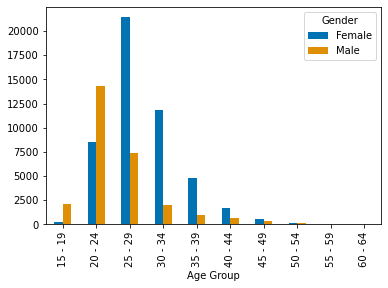

In [30]:
with sns.color_palette('colorblind'):
    piv_job.plot(kind='bar')